In [6]:
# this excercise will attempt to use gradient descent to predict
# a known prediction function (y = 5x + 9)
# the independet variable x will be the list x = [1, 2, 5, 6, 10]
# the dependent variable y will be the list y = [14, 19, 34, 39, 59]

# the cost function used will be Mean Sqaured Error
# the gradient descent algorithm will use known inputs (x) and known outputs (y)
# to predict m and b (y = mx + b) where y was produced with y = 5x + 9

# gradient descent will terminate when MSE minimum is reached

# note that the dervivative of x^2 is 2x
# and that with a function with 2 variables: f(x, y) = x^2 + y^2
# partial derivatives in terms of x alone or y alone are:
# f'(x) = 2x + 0 = 2x
# f'(y) = 0 + 2y = 2y
# this partial derivative will be applied to the MSE cost function

# in our prediction function (y = mx +b) we want to find the partial derivatives of m and b
# in the MSE cost function:
# MSE = (1/n) sum{i = 0 to n}(yi - ypredicted)^2
#     = (1/n) sum{i = 0 to n}(yi - (mxi + b))^2

# this makes the partial derivates for m and b as follows:
# f'(m) = -(2/n) sum{i = 0 to n}xi(yi - (mxi + b))
# f'(b) = -(2/n) sum{i = 0 to n}(yi - (mxi + b))
# these partial derivatives will be implemented in python below

# in addition to the partial derivatives which provide slope information for the gradiant descent
# we also need a 'learning rate' which is a size of the next step in gradient descent
# m = m - learning rate * f'(m)
# b = b - learning rate * f'(b)
# the learning rate will also be implemented in python below


import numpy as np
import math
import logging
import matplotlib.pyplot as plt

def grad_descent(x, y, iterations, learning_rate):
    # start with an arbitrary value of m and b
    m_current = 0
    b_current = 0
    mse_increasing = False
    previous_mse = float('inf')

    %matplotlib inline
    plt.title("Gradient Descent y = 5x + 9")
    plt.xlabel("X")
    plt.ylabel("Y")
    #add the original points as a scatter plot
    plt.scatter(x, y, alpha=0.5)

    x_iter = np.linspace(0, 10, 60)

    for i in range (iterations):
        y_predicted = m_current * x + b_current
        # mse
        mse = (1/n) * sum([val**2 for val in (y - y_predicted)])
        # calculated m-derivative (md) and b-derivative (bd)
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        m_current = m_current - learning_rate * md
        b_current = b_current - learning_rate * bd

        # add current iteration to a plot
        y_iter = m_current * x_iter + b_current
        plt.plot(x_iter, y_iter , color="orange")

        if (mse > previous_mse):
            mse_increasing = True
        logging.info("m = {}, b = {}, mse = {}, prev_mse = {}, mse_inc = {}, iteration {}".format(m_current, b_current, mse, previous_mse, mse_increasing, i))

        if (mse_increasing or math.isclose(0, mse, abs_tol=1e-20)):
            break

        previous_mse = mse

    return m_current, b_current

prediction function: m = 5.00000000002622, b = 8.999999999820286
see gradient_descent.log for iteration steps


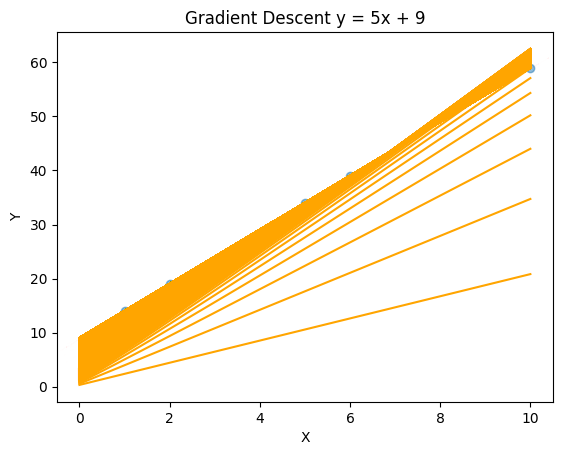

In [7]:
x = np.array([1, 2, 5, 6, 10])
y = np.array([14, 19, 34, 39, 59])

# number of steps
iterations = 10000
n = len(x) # assuming for this purpose lex(x) == len(y)
learning_rate = 0.0049
log_file = "gradient_descent.log"

logging.basicConfig(
    filename=log_file,
    encoding="utf-8",
    filemode="w", level=logging.INFO, format="{levelname}:{message}", style="{")

m, b = grad_descent(x , y, iterations, learning_rate)
print("prediction function: m = {}, b = {}".format(m, b))
print("see {} for iteration steps".format(log_file))